# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

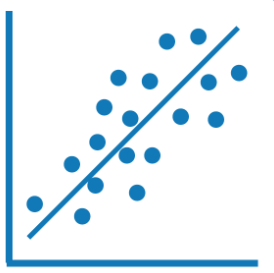

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [4]:
#solution
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [29]:
df = pd.DataFrame(boston.data,columns = boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


In [30]:
#Solution
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [27]:
## Creating correlation between different feature and target
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000

<AxesSubplot:>

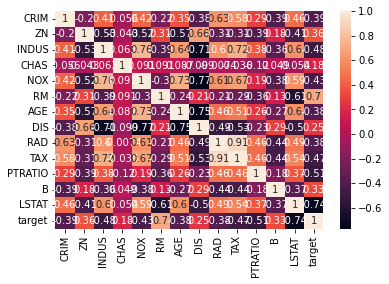

In [31]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [32]:
#Create feature X
import numpy as np
x = df[['RM']]
y = df.target
x

RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]

In [33]:
#Create linear model
#lr is linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#train model using fit method
lr.fit(x,y)


LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [34]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model

lr.coef_


array([9.10210898])

In [35]:
#use intercept_ attributes to get the bias value

lr.intercept_


-34.670620776438554

In [36]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [40]:
#using maths  formula
y_hat = lr.coef_*df.RM[0] + lr.intercept_
y_hat

array([25.17574577])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [41]:
#creating y_pred
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x)
MSE = mean_squared_error(y_pred, y)
MSE

43.60055177116956

## <font color = blue>5. Make Predictions


In [44]:
x_sample = [[6]]
lr.predict(x_sample)[0]

19.942033110643294

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [47]:
MX = df[['RM','LSTAT','PTRATIO']]
y = df.target
MX

RM  LSTAT  PTRATIO
0    6.575   4.98     15.3
1    6.421   9.14     17.8
2    7.185   4.03     17.8
3    6.998   2.94     18.7
4    7.147   5.33     18.7
..     ...    ...      ...
501  6.593   9.67     21.0
502  6.120   9.08     21.0
503  6.976   5.64     21.0
504  6.794   6.48     21.0
505  6.030   7.88     21.0

[506 rows x 3 columns]

## <font color = blue>7. Make Prediction for Multi linear Model


In [48]:
#Solution

mlr = LinearRegression()
mlr.fit(MX,y)

LinearRegression()

In [49]:
y_pred = mlr.predict(MX)
MSE  = mean_squared_error(y_pred, y)
MSE

27.13040575849706

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [51]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
numeric = Scaler.fit_transform(df)
new_df = pd.DataFrame(numeric, columns=df.columns)
new_df


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  
..        ...       ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147 -0.014454  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850 -0.210362  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  0.148802  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302 -0.057989  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058 -1.157248  

[506 rows x 14 columns]